# 4. Đặt câu hỏi và trả lời

In [54]:
#import các thứ viện cần thiết
import pandas as pd
import numpy as np
%pip install matplotlib-venn
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.


In [55]:
#đọc file csv
df = pd.read_csv('data/mxmh_survey_results_clean.csv')
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
1,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
2,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
3,18,Spotify,5,Yes,Yes,Yes,Jazz,Yes,Yes,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
4,18,YouTube Music,3,Yes,Yes,No,Video game music,Yes,Yes,66,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve


In [56]:
metal_healths = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Lọc ra các cột liên quan đến tần suất nghe nhạc
frequency_columns = [col for col in df.columns if col.startswith('Frequency')]

# Tạo DataFrame mới chỉ chứa dữ liệu tần suất nghe nhạc
df_frequency = df[frequency_columns]
# Tạo dữ liệu dataframe cho mental health
df_mh = df[metal_healths]

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 1:  Vấn đề về sức khỏe tinh thần của những người tham gia như thế nào ? Vấn đề này có đáng lo ngại không?  </b></font>

<font color="red"><b>Câu hỏi có lợi ích gì:  </b></font> <font color="red"></font>

</div>

- Trước tiên, chúng ta xem xét sự phân bố của từng loại triệu chứng tâm lý trong từng loại bệnh.

Anxiety       5.816109
Depression    4.740122
Insomnia      3.655015
OCD           2.607903
dtype: float64


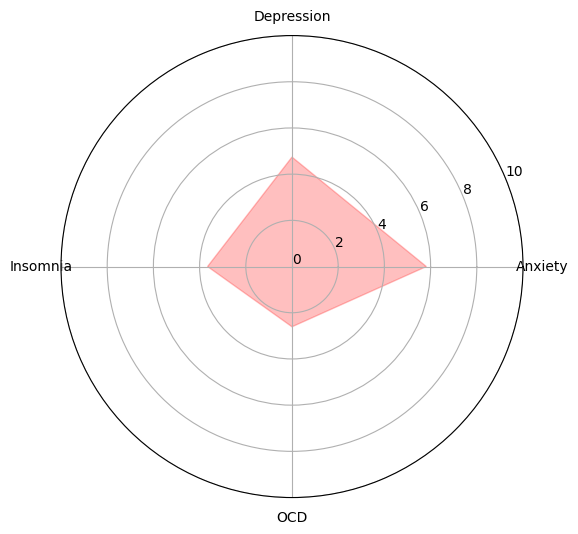

In [57]:
# Biểu đồ spider chart cho về mức độ trung bình của 4 triệu chứng metal health

# Tính trung bình của mỗi loại triệu chứng sức khỏe tâm thần
mental_health_means = df_mh.mean()
print(mental_health_means)
# Tạo một biểu đồ spider
labels = np.array(mental_health_means.index)
num_vars = len(labels)

# Tính toán góc của mỗi trục trong biểu đồ
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Đảm bảo biểu đồ spider bắt đầu và kết thúc ở cùng một điểm
values = mental_health_means.tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)

# Set the yticks (radii)
ax.set_yticks(np.arange(0, 11, 2))  # Assuming the values range from 0 to 10
ax.set_yticklabels(np.arange(0, 11, 2))

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.show()


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Anxiety (Lo Âu): Điểm trung bình là 5.816, đây là điểm số cao nhất trong bốn loại bệnh. Điều này cho thấy tình trạng lo âu xuất hiện nhiều nhất hoặc nghiêm trọng nhất trong số các tình trạng được khảo sát. Người tham gia có xu hướng trải qua các triệu chứng lo âu ở mức độ trung bình đến khá cao.

- Depression (Trầm Cảm): Điểm trung bình là 4.740, nằm ở mức độ trung bình. Điều này chỉ ra rằng tình trạng trầm cảm cũng khá phổ biến trong nhóm người được khảo sát, nhưng không phổ biến hoặc nghiêm trọng bằng lo âu.

- Insomnia (Mất Ngủ): Điểm trung bình là 3.655, thấp hơn so với lo âu và trầm cảm. Điều này có thể cho thấy mức độ mất ngủ không quá nghiêm trọng hoặc không quá phổ biến so với hai tình trạng kia trong nhóm này.

- OCD (Rối Loạn Ám Ảnh Cưỡng Chế): Điểm trung bình thấp nhất là 2.607, cho thấy rằng trong số các tình trạng được khảo sát, OCD có vẻ ít phổ biến hoặc ít nghiêm trọng nhất.
</b></font>

<font color="red"><b>
=> Nhìn chung, dựa trên điểm trung bình, có thể thấy rằng lo âu và trầm cảm là hai vấn đề tâm lý chính mà nhóm người tham gia khảo sát gặp phải. Điều này có thể phản ánh nhu cầu chú trọng hơn vào việc điều trị và hỗ trợ cho những người đang chịu đựng lo âu và trầm cảm.
</b></font>


</div>

- Chọn ngưỡng 5 là ngưỡng để phân loại những người có triệu chứng tâm lý và những người không có triệu chứng tâm lý. Những người có điểm trung bình từ 5 trở lên sẽ được xem là có triệu chứng tâm lý, ngược lại những người có điểm dưới 5 sẽ được xem là không có triệu chứng tâm lý.

In [58]:
# Lọc những người tham gia khảo sát có điểm trên 5 ở các trường Anxiety, Depression, Insomnia, OCD
custom_colormap = ['skyblue', 'lightgreen', 'sandybrown', 'salmon']
df_anxiety = df[df['Anxiety'] > 5]
df_depression = df[df['Depression'] > 5]
df_insomnia = df[df['Insomnia'] > 5]
df_ocd = df[df['OCD'] > 5]

In [59]:
# Tạo các set cho mỗi loại bệnh
set_anxiety = set(df_anxiety.index)
set_depression = set(df_depression.index)
set_insomnia = set(df_insomnia.index)
set_ocd = set(df_ocd.index)
print(f'Số người phải mắc phải triệu chứng Lo lắng là: {len(set_anxiety)}')
print(f'Số người phải mắc phải triệu chứng Trầm cảm là: {len(set_depression)}')
print(f'Số người phải mắc phải triệu chứng Mất ngủ là: {len(set_insomnia)}')
print(f'Số người phải mắc phải triệu chứng Rối loạn ám ảnh là: {len(set_ocd)}')


Số người phải mắc phải triệu chứng Lo lắng là: 399
Số người phải mắc phải triệu chứng Trầm cảm là: 302
Số người phải mắc phải triệu chứng Mất ngủ là: 202
Số người phải mắc phải triệu chứng Rối loạn ám ảnh là: 114


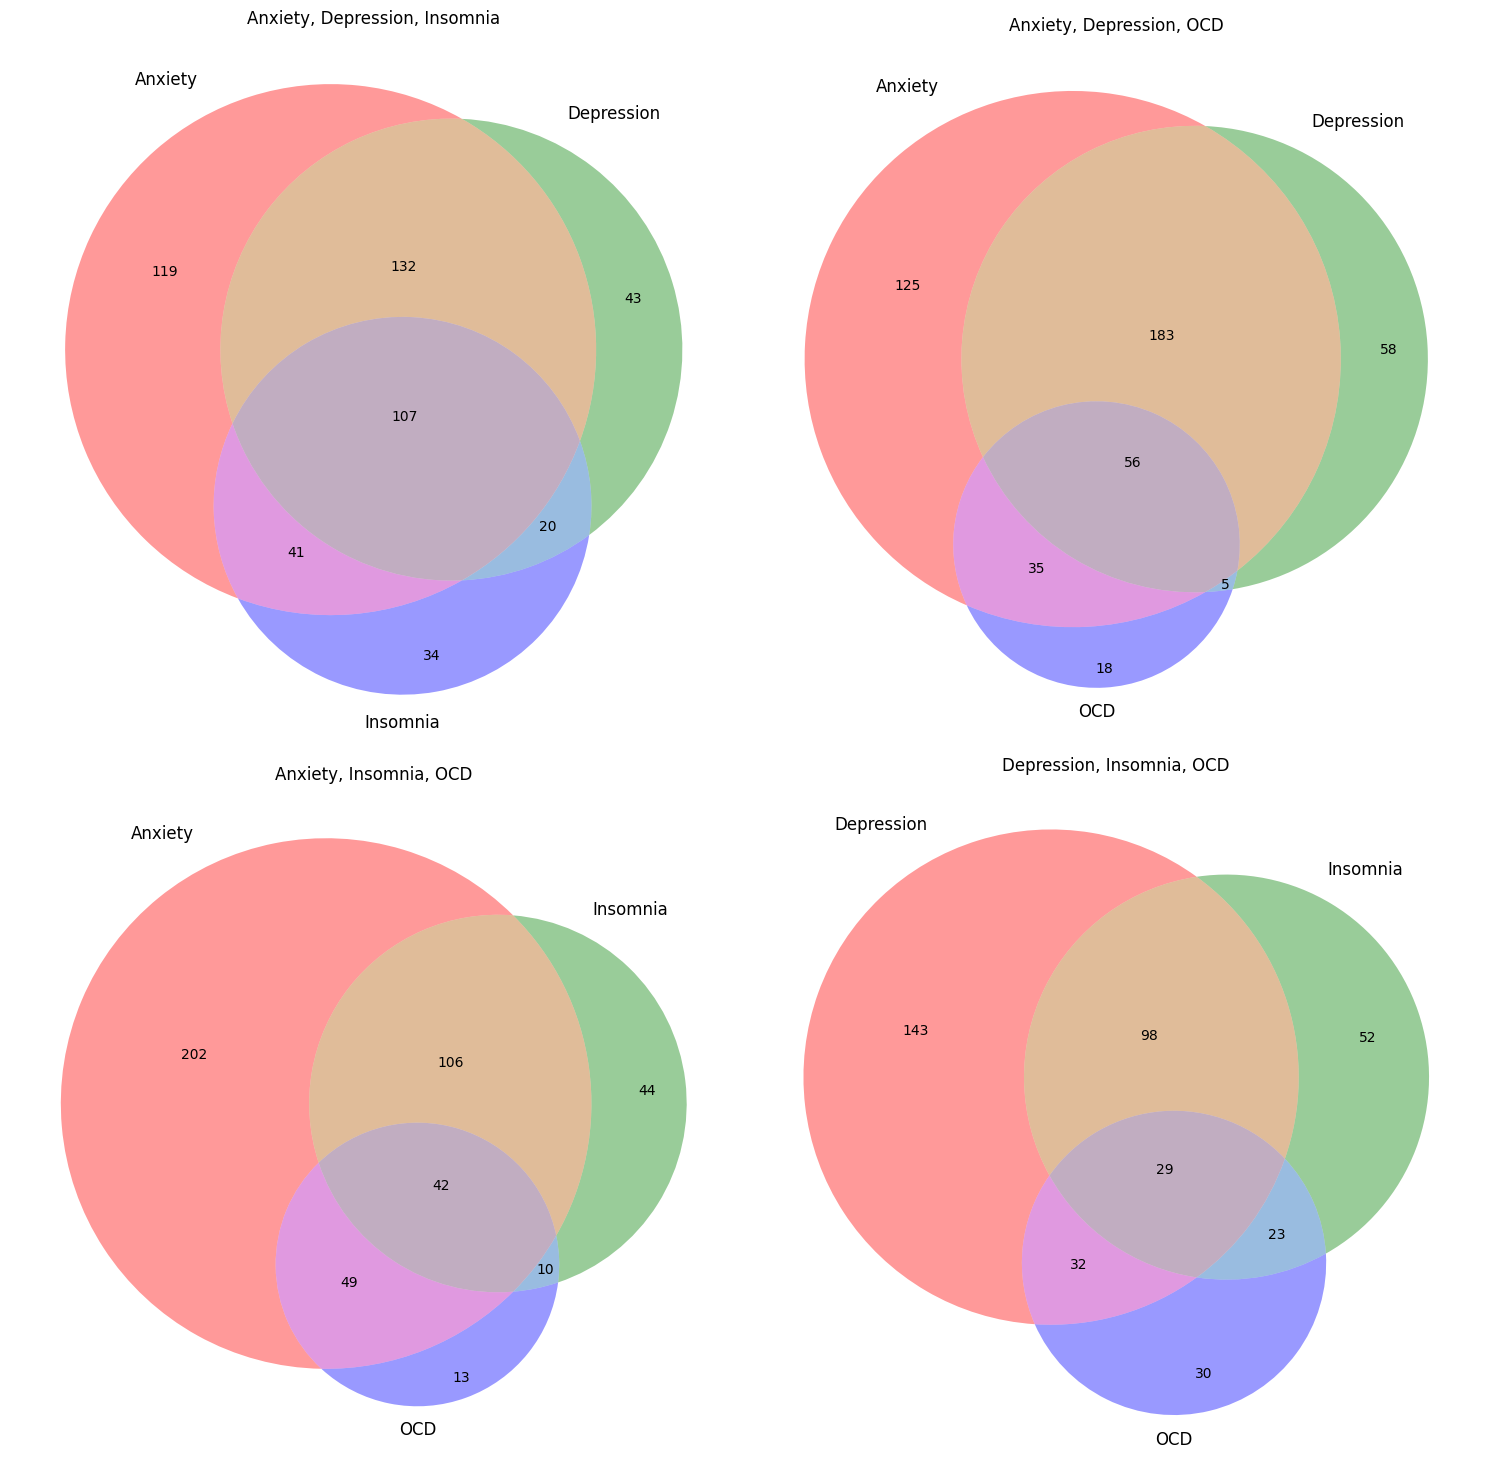

In [60]:
# Vẽ biểu đồ Venn để thấy sự giao nhau của các loại bệnh
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Biểu đồ Venn cho Anxiety, Depression, Insomnia
venn3([set_anxiety, set_depression, set_insomnia], ('Anxiety', 'Depression', 'Insomnia'), ax=axes[0, 0])
axes[0, 0].set_title('Anxiety, Depression, Insomnia')

# Biểu đồ Venn cho Anxiety, Depression, OCD
venn3([set_anxiety, set_depression, set_ocd], ('Anxiety', 'Depression', 'OCD'), ax=axes[0, 1])
axes[0, 1].set_title('Anxiety, Depression, OCD')

# Biểu đồ Venn cho Anxiety, Insomnia, OCD
venn3([set_anxiety, set_insomnia, set_ocd], ('Anxiety', 'Insomnia', 'OCD'), ax=axes[1, 0])
axes[1, 0].set_title('Anxiety, Insomnia, OCD')

# Biểu đồ Venn cho Depression, Insomnia, OCD
venn3([set_depression, set_insomnia, set_ocd], ('Depression', 'Insomnia', 'OCD'), ax=axes[1, 1])
axes[1, 1].set_title('Depression, Insomnia, OCD')

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Từ các set ta có thể xác định được số người mắc phải triệu chứng tâm lý: 399 người mắc phải lo âu, 302 người mắc phải trầm cảm, 202 người mắc phải mất ngủ và 114 người mắc phải rối loạn ám ảnh cưỡng chế.
- Sau đó là biểu đổ Venn để thể hiện mỗi liên hệ giữa các triệu chứng tâm lý. Nổi bật nhất là biểu đồ số 1 với Anxiety, Depression, Insomnia (Lo âu, Trầm cảm, Mất ngủ): Phần giao nhau lớn nhất là giữa Anxiety và Depression với 132 người, cho thấy có một số lượng lớn người tham gia mắc cả hai tình trạng này. 107 người mắc cả ba tình trạng, cũng là một con số đáng kể, chỉ ra rằng có một mối liên hệ mạnh mẽ giữa ba tình trạng này.
- Tương tự những biểu đồ còn cũng thể hiện mối liên hệ giữa các tình trạng tâm lý khác nhau. Nhưng tình trang tâm lý Anxiety và Depression nổi bật nhất, sau đó đến Insomnia và OCD chỉ có một số ít người tham gia mắc phải.
</b></font>

<font color="red"><b>
=> Tóm lại, các biểu đồ Venn này hữu ích trong việc trực quan hóa mức độ chồng chéo giữa các tình trạng tâm lý khác nhau trong một nhóm người. Chúng cho thấy rằng Anxiety và Depression có vẻ như là hai tình trạng phổ biến nhất và thường xuyên xuất hiện cùng nhau. 
</b></font>


</div>

In [61]:
# Phân tích tỉ lệ một người có thể mắc nhiều vấn đề tinh thần cùng lúc
four_issue = set_anxiety.intersection(set_depression, set_insomnia, set_ocd)

three_issue = set()
three_issue.update(set_anxiety.intersection(set_depression, set_insomnia))
three_issue.update(set_anxiety.intersection(set_depression, set_ocd))
three_issue.update(set_anxiety.intersection(set_insomnia, set_ocd))
three_issue.update(set_depression.intersection(set_insomnia, set_ocd))
three_issue.difference_update(four_issue)

two_issue = set()
two_issue.update(set_anxiety.intersection(set_depression))
two_issue.update(set_anxiety.intersection(set_insomnia))
two_issue.update(set_anxiety.intersection(set_ocd))
two_issue.update(set_depression.intersection(set_insomnia))
two_issue.update(set_depression.intersection(set_ocd))
two_issue.update(set_insomnia.intersection(set_ocd))
two_issue.difference_update(three_issue)
two_issue.difference_update(four_issue)

# Tạo tập hợp cho mỗi loại bệnh
one_issue_anxiety = set_anxiety.difference(set_depression, set_insomnia, set_ocd)
one_issue_depression = set_depression.difference(set_anxiety, set_insomnia, set_ocd)
one_issue_insomnia = set_insomnia.difference(set_anxiety, set_depression, set_ocd)
one_issue_ocd = set_ocd.difference(set_anxiety, set_depression, set_insomnia)
# Kết hợp các tập hợp
one_issue = one_issue_anxiety.union(one_issue_depression, one_issue_insomnia, one_issue_ocd)

# Tính toán số người mắc đúng n loại bệnh
total = len(df)
four_issue_count = len(four_issue)
three_issue_count = len(three_issue)
two_issue_count = len(two_issue)
one_issue_count = len(one_issue)

no_issue_count = total - four_issue_count - three_issue_count - two_issue_count - one_issue_count

print(f'Tổng số người tham gia khảo sát là {total}. Trong đó có\n- {no_issue_count} người khỏe mạnh, \
      \n- {one_issue_count} người chỉ mắc một vấn đề tinh thần,\n- {two_issue_count} người mắc hai vấn đề tinh thần, \
      \n- {three_issue_count} người mắc ba vấn đề tinh thần và \n- {four_issue_count} người mắc cả bốn vấn đề tinh thần.')

Tổng số người tham gia khảo sát là 658. Trong đó có
- 151 người khỏe mạnh,       
- 179 người chỉ mắc một vấn đề tinh thần,
- 172 người mắc hai vấn đề tinh thần,       
- 130 người mắc ba vấn đề tinh thần và 
- 26 người mắc cả bốn vấn đề tinh thần.


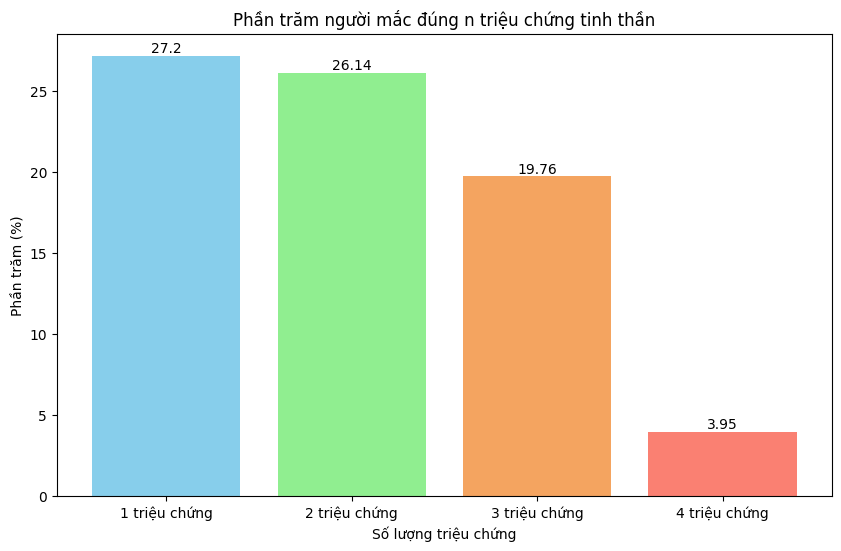

In [62]:
# Tính tỷ lệ phần trăm và vẽ biểu đồ
percent_four_issue = four_issue_count / total * 100
percent_three_issue = three_issue_count / total * 100
percent_two_issue = two_issue_count / total * 100
percent_one_issue = one_issue_count / total * 100


# Tạo biểu đồ cột
percentages = [percent_one_issue, percent_two_issue, percent_three_issue, percent_four_issue]
issues = ['1 triệu chứng', '2 triệu chứng', '3 triệu chứng', '4 triệu chứng']

plt.figure(figsize=(10, 6))
bars = plt.bar(issues, percentages, color= custom_colormap)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Số lượng triệu chứng')
plt.ylabel('Phần trăm (%)')
plt.title('Phần trăm người mắc đúng n triệu chứng tinh thần')
plt.show()


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Tổng kết  </b></font>

<font color="red"><b>Sự Phổ Biến của Các Triệu Chứng:</b></font> 
<font color="red">
Có một tỷ lệ đáng kể người tham gia khảo sát trải qua ít nhất một vấn đề về sức khỏe tinh thần, với một số lượng lớn người chỉ mắc một triệu chứng.
Tuy nhiên, có một số lượng không nhỏ người mắc hai triệu chứng, chỉ ra rằng sức khỏe tinh thần là một vấn đề đa diện và có thể ảnh hưởng đến người tham gia theo nhiều cách khác nhau.
</font>

<font color="red"><b>Mức Độ Nghiêm Trọng:</b></font> 
<font color="red">
Dựa vào điểm trung bình của từng loại bệnh, Anxiety (Lo âu) và Depression (Trầm cảm) có điểm số cao hơn so với Insomnia (Mất ngủ) và OCD (Rối loạn ám ảnh cưỡng chế), cho thấy rằng lo âu và trầm cảm có thể là những vấn đề sức khỏe tinh thần phổ biến và nghiêm trọng hơn trong nhóm này.
</font>

<font color="red"><b>Sự Chồng Chéo Của Các Vấn Đề:</b></font> 
<font color="red">
Biểu đồ Venn cho thấy có sự chồng chéo đáng kể giữa các tình trạng tâm lý. Điều này phản ánh thực tế phức tạp của sức khỏe tinh thần, nơi một người có thể trải qua nhiều vấn đề cùng một lúc, và những vấn đề này thường có mối liên quan chặt chẽ với nhau.
</font>
</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 2:  Phân tích những lựa chọn, sở thích nghe nhạc của những người tham gia khảo sát khi các triệu chứng tinh thần diễn ra thường xuyên hơn (> 5 ở thang 10)  </b></font>

<font color="red"><b>Câu hỏi có lợi ích gì:  </b></font> <font color="red">Việc phân tích những yếu tố tác động đến sức khỏe tinh thân giúp chúng ta có cái nhìn chi tiết hơn về vấn để tinh thần của mọi người. Nhìn nhận việc nghe nhạc tác động đến sức khỏe ở nhiều góc cạnh khác nhau, tìm ra những khác biệt của những người các triệu chứng về sức khỏe tinh thần, để kip thời phát hiện và chữa trị sớm nhất</font>

</div>

- Sô giờ nghe nhạc của họ trung bình của họ là bao nhiêu, và có chệnh lệch gì so với những người còn lại không?

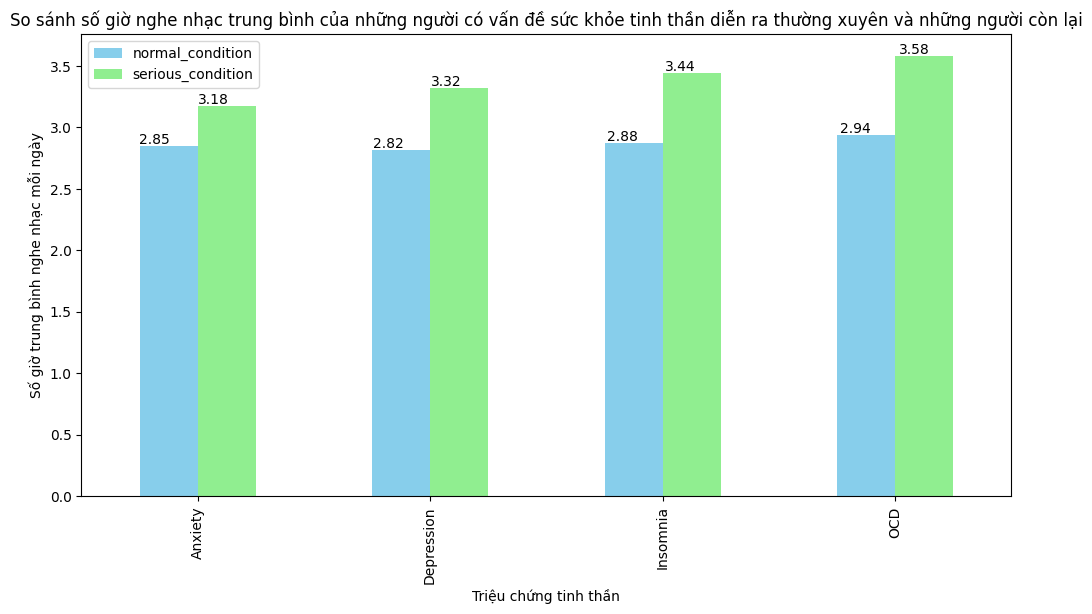

In [63]:
# Biểu đồ cột đôi để so sánh số giời nghe nhạc trung bình của những người này so với những người còn lại

# Tạo dictionary để lưu trữ kết quả
average_hours = {'normal_condition': [], 'serious_condition': []}

# Tính trung bình số giờ nghe nhạc cho mỗi nhóm và mỗi bệnh lý
for metal_health in metal_healths:
    df_serious = df[df[metal_health] > 5]
    df_normal = df[df[metal_health] <= 5]

    average_hours['normal_condition'].append(df_normal['Hours per day'].mean())
    average_hours['serious_condition'].append(df_serious['Hours per day'].mean())

# Chuyển dictionary thành DataFrame
average_hours_df = pd.DataFrame(average_hours, index=metal_healths)

# Vẽ biểu đồ
ax = average_hours_df.plot(kind='bar', figsize=(12, 6), color = custom_colormap)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Triệu chứng tinh thần')
plt.ylabel('Số giờ trung bình nghe nhạc mỗi ngày')
plt.title('So sánh số giờ nghe nhạc trung bình của những người có vấn đề sức khỏe tinh thần diễn ra thường xuyên và những người còn lại')
plt.show()

- Có thể thấy trung bình số giờ nghe nhạc trong ngày của các nhóm người này cao hơn so với trung bình của tất cả mọi người nhưng không đáng kể
- Tiếp theo chúng ta tìm hiểu tần suất nghe nhạc của những người này ở từng thể loại nhạc

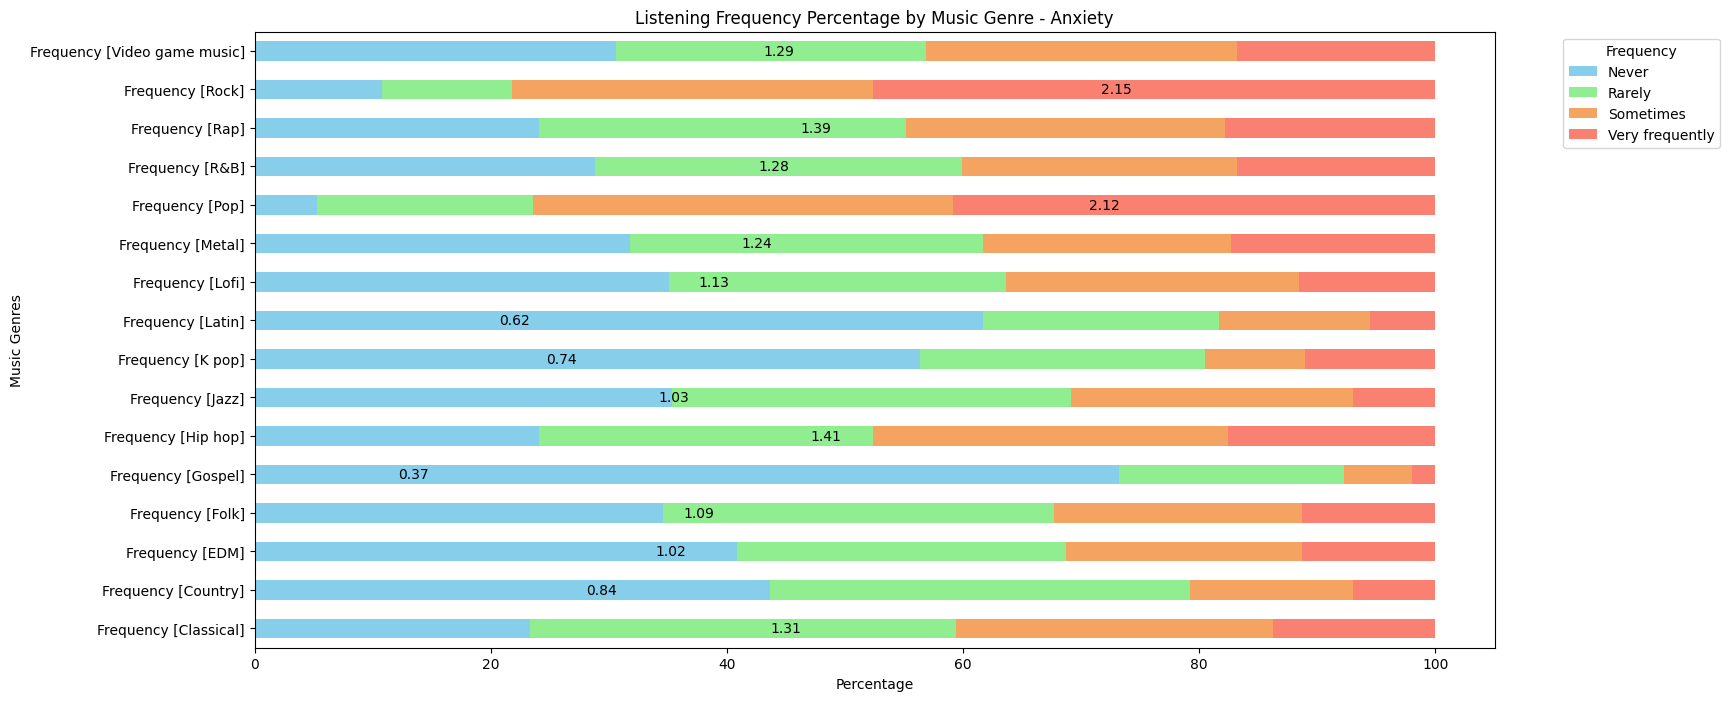

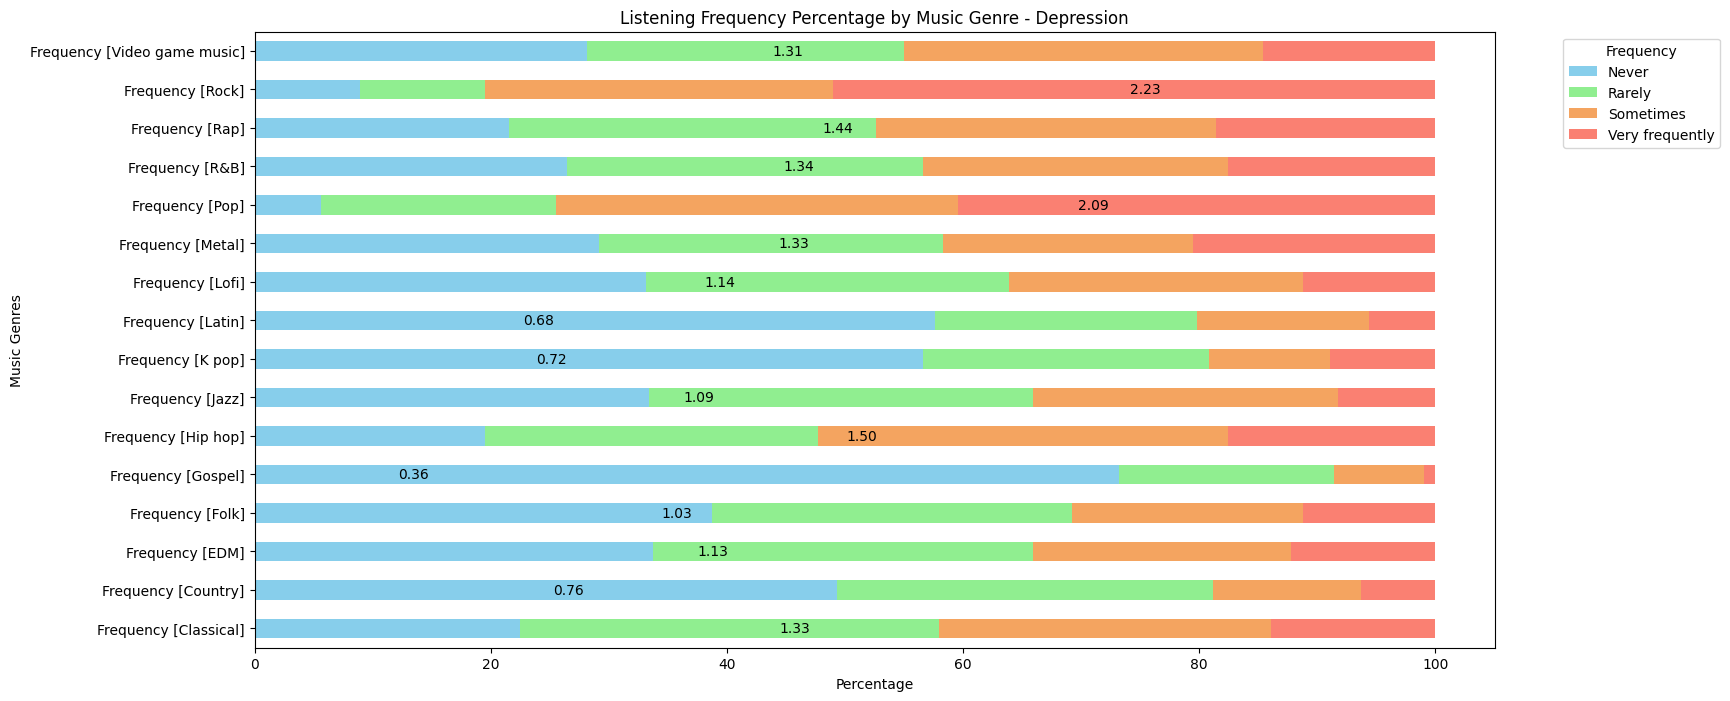

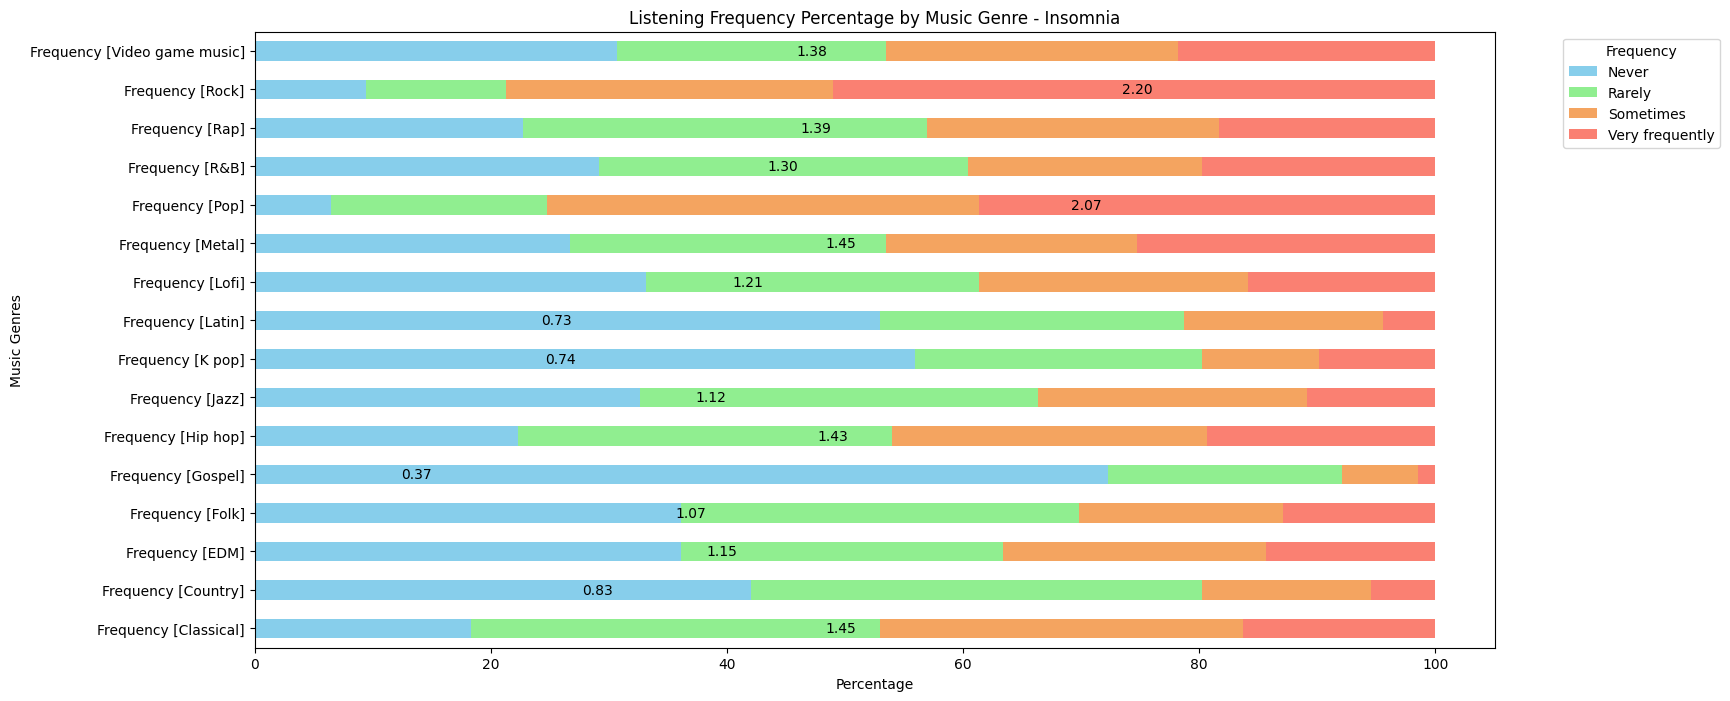

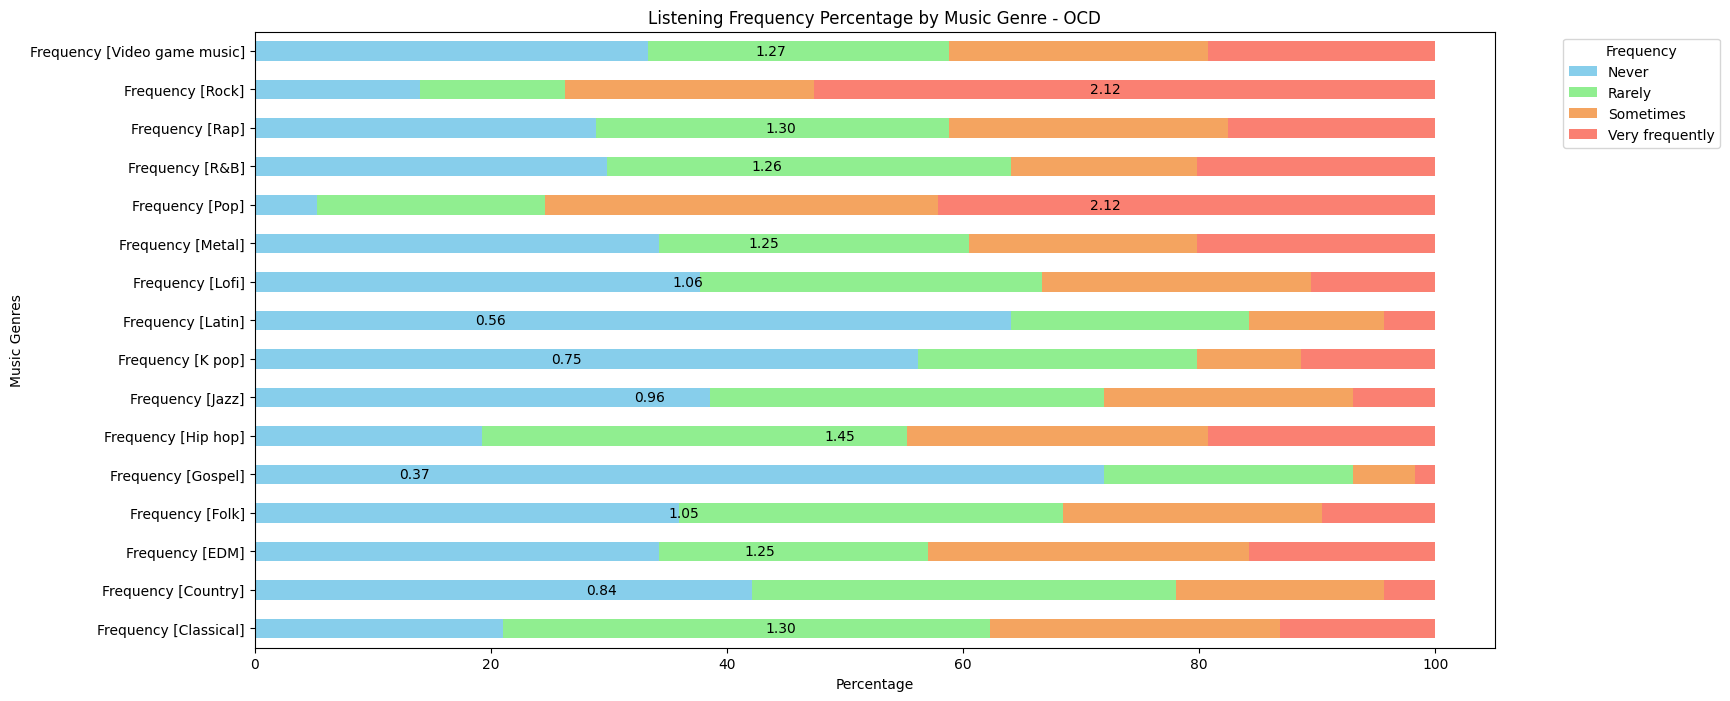

In [64]:
# Biểu đồ stack bar chart horizontal 100% để thể hiện % trăn của tần suất nghe nhạc['Nerver', 'Rarely', 'Sometimes', 'Very frequently'] theo từng thể loại nhạc


# Tạo một hàm để tính tỷ lệ phần trăm tần suất nghe nhạc cho mỗi thể loại
def calculate_frequency_percentages(df):
    frequency_counts = df[frequency_columns].apply(pd.Series.value_counts).fillna(0)
    frequency_percentages = frequency_counts.div(frequency_counts.sum()).multiply(100)
    return frequency_percentages

# Tính tỷ lệ phần trăm cho mỗi loại bệnh
percentages_anxiety = calculate_frequency_percentages(df_anxiety)
percentages_depression = calculate_frequency_percentages(df_depression)
percentages_insomnia = calculate_frequency_percentages(df_insomnia)
percentages_ocd = calculate_frequency_percentages(df_ocd)


# Mapping giá trị tần suất thành số
frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}

# Áp dụng mapping cho DataFrame
df_mapped = df.copy()
for col in frequency_columns:
    df_mapped[col] = df_mapped[col].map(frequency_mapping)

# Tính trung bình cho từng loại bệnh
average_anxiety = df_mapped.loc[df['Anxiety'] > 5, frequency_columns].mean()
average_depression = df_mapped.loc[df['Depression'] > 5, frequency_columns].mean()
average_insomnia = df_mapped.loc[df['Insomnia'] > 5, frequency_columns].mean()
average_ocd = df_mapped.loc[df['OCD'] > 5, frequency_columns].mean()


# Tạo biểu đồ với trung bình số được hiển thị bên cạnh
def plot_frequency_percentages(percentages, averages, title, colors=custom_colormap):
    fig, ax = plt.subplots(figsize=(16, 8))

    # Vẽ stacked bar chart
    percentages.T.plot(kind='barh', stacked=True, ax=ax, color=colors)

    # Thêm các giá trị trung bình
    for i, genre in enumerate(averages.index):
        ax.text(averages[genre] * 100 / 3, i, f'{averages[genre]:.2f}', va='center')

    ax.set_xlabel('Percentage')
    ax.set_ylabel('Music Genres')
    ax.set_title(title)
    plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    
plot_frequency_percentages(percentages_anxiety,average_anxiety, 'Listening Frequency Percentage by Music Genre - Anxiety')
plot_frequency_percentages(percentages_depression,average_depression, 'Listening Frequency Percentage by Music Genre - Depression')
plot_frequency_percentages(percentages_insomnia,average_insomnia, 'Listening Frequency Percentage by Music Genre - Insomnia')
plot_frequency_percentages(percentages_ocd, average_ocd,'Listening Frequency Percentage by Music Genre - OCD')

- Việc nghe nhạc như thế này có giúp cải thiện tinh thần của họ không?

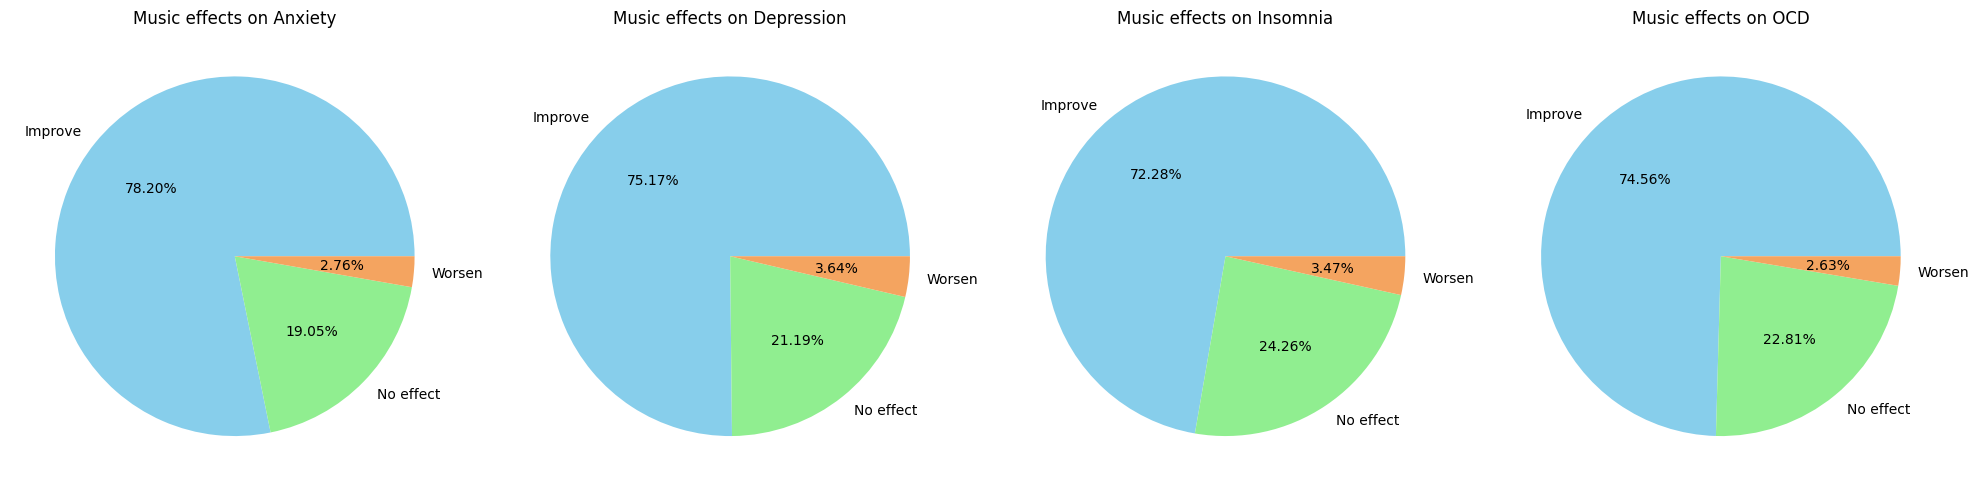

In [65]:
df_axiety_effect = df_anxiety['Music effects'].value_counts()
df_depression_effect = df_depression['Music effects'].value_counts()
df_insomnia_effect = df_insomnia['Music effects'].value_counts()
df_ocd_effect = df_ocd['Music effects'].value_counts()


fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 hàng, 4 cột

# Biểu đồ tròn cho Anxiety
df_axiety_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[0], title='Music effects on Anxiety', colors=custom_colormap)
axes[0].set_ylabel('')

# Biểu đồ tròn cho Depression
df_depression_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[1], title='Music effects on Depression', colors=custom_colormap)
axes[1].set_ylabel('')

# Biểu đồ tròn cho Insomnia
df_insomnia_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[2], title='Music effects on Insomnia', colors=custom_colormap)
axes[2].set_ylabel('')

# Biểu đồ tròn cho OCD
df_ocd_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[3], title='Music effects on OCD', colors=custom_colormap)
axes[3].set_ylabel('')

plt.tight_layout()
plt.show()


Có thể nhận thấy phần lớn những người gặp các vấn đề về tinh thần ở mức độ nặng tham gia khảo sát đều cho rằng âm nhạc có thể giúp họ cải thiện tinh thần. Nhưng bên cạnh đó vẫn còn một số người cho rằng âm nhạc không có ảnh hưởng với họ và thậm chí còn làm cho tinh thần của họ trở nên tồi tệ đi

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Tổng kết nghiên cứu  </b></font>

<font color="red"><b>Câu hỏi: </b></font>
 <font color="red"></font>

<font color="red"><b>Trả lời :</b></font> 
<font color="red"></font>

</div>

### Câu 2: Những người ở độ tuổi khác nhau có sở thích về âm nhạc khác nhau như thế nào? Xu hướng thưởng thức âm nhạc của họ ảnh hưởng như thế nào?

C:\Users\huynh\AppData\Local\Temp\ipykernel_11788\1304810029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Fav genre', data=df,  palette=cmap.colors)


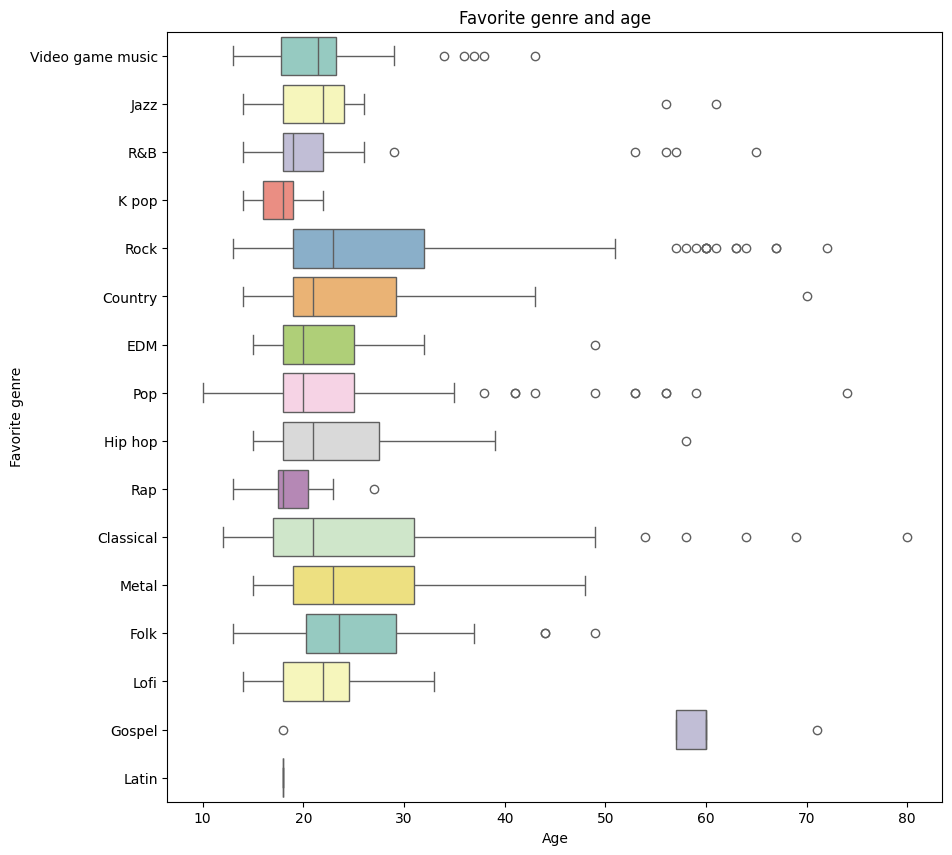

In [71]:
#Vẽ biểu đồ boxplot giữa favorite genres và độ tuổi của tất cả mọi người
fig = plt.figure(figsize=(10, 10))
cmap = plt.get_cmap('Set3')
sns.boxplot(x='Age', y='Fav genre', data=df,  palette=cmap.colors)
plt.title('Favorite genre and age')
plt.xlabel('Age')
plt.ylabel('Favorite genre')
plt.show()

- Bỏ qua những loại nhạc có quá ít mẫu thì có thể thấy người trẻ thường có sở thích rất đa dạng, trải đều các thể loại nhạc khác nhau. Ngược lại với người lớn tuổi thì sở thích nghe nhạc của họ tập trung vào các thể loại như Rock, Pop, Classical, R&B

Vậy xu hướng thưởng thức âm nhạc của mỗi người có sự khác biệt dựa trên tuổi tác của họ không?
- Đầu tiên, chúng ta hãy xem mọi người có thói quen sáng tác nhạc như một cách hưởng thụ âm nhạc hay không?



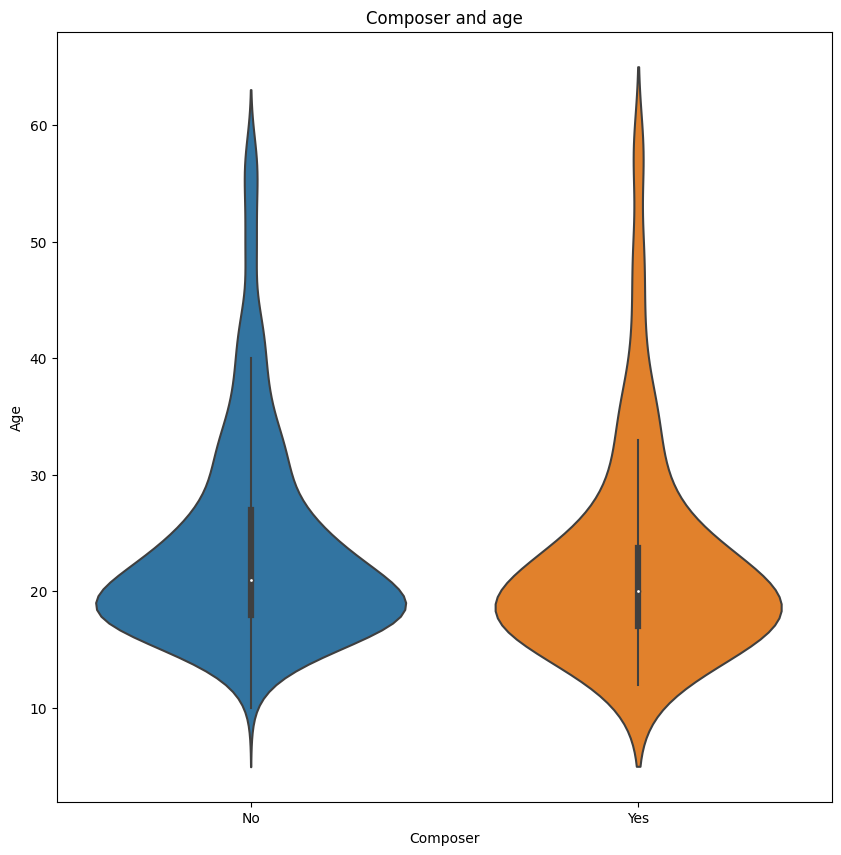

In [24]:
#Vẽ biểu đồ violin plot giữa composer và độ tuổi của tất cả mọi người
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'Composer', y = 'Age', data = df)
plt.title('Composer and age')
plt.ylabel('Age')
plt.xlabel('Composer')
plt.show()

- Tiếp đến, mọi người có thói quen chơi nhạc cụ hay không?

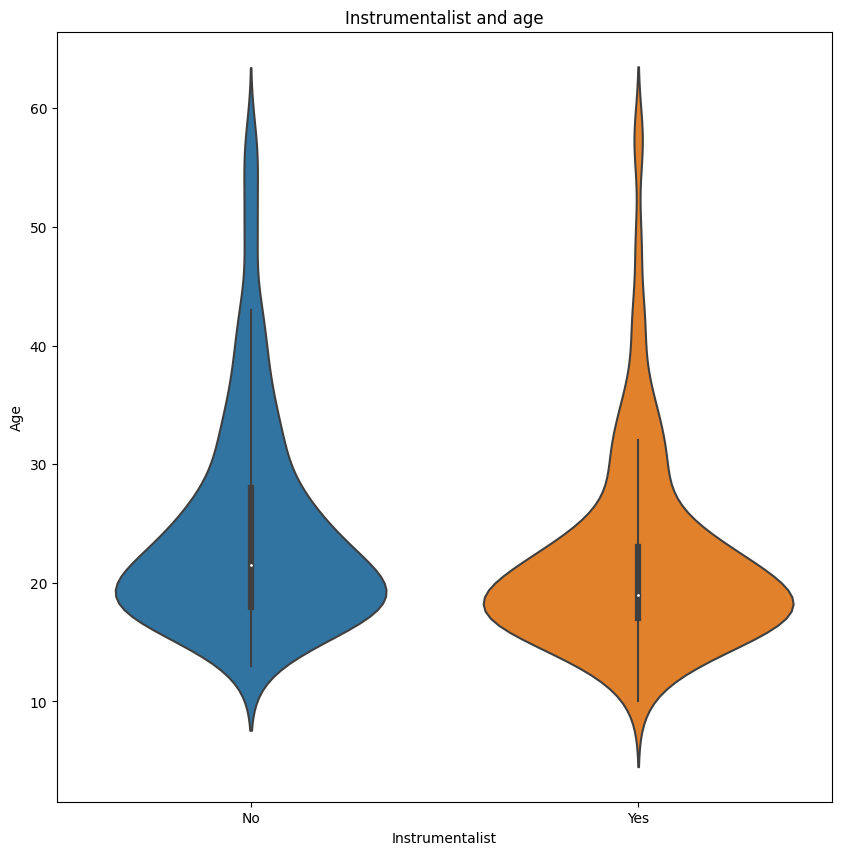

In [25]:
#Vẽ biểu đồ violin plot giữa thói quen chơi nhạc cụ và độ tuổi của tất cả mọi người
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'Instrumentalist', y = 'Age', data = df)
plt.title('Instrumentalist and age')
plt.ylabel('Age')
plt.xlabel('Instrumentalist')
plt.show()

- Họ có nghe nhạc lúc làm việc hay không?

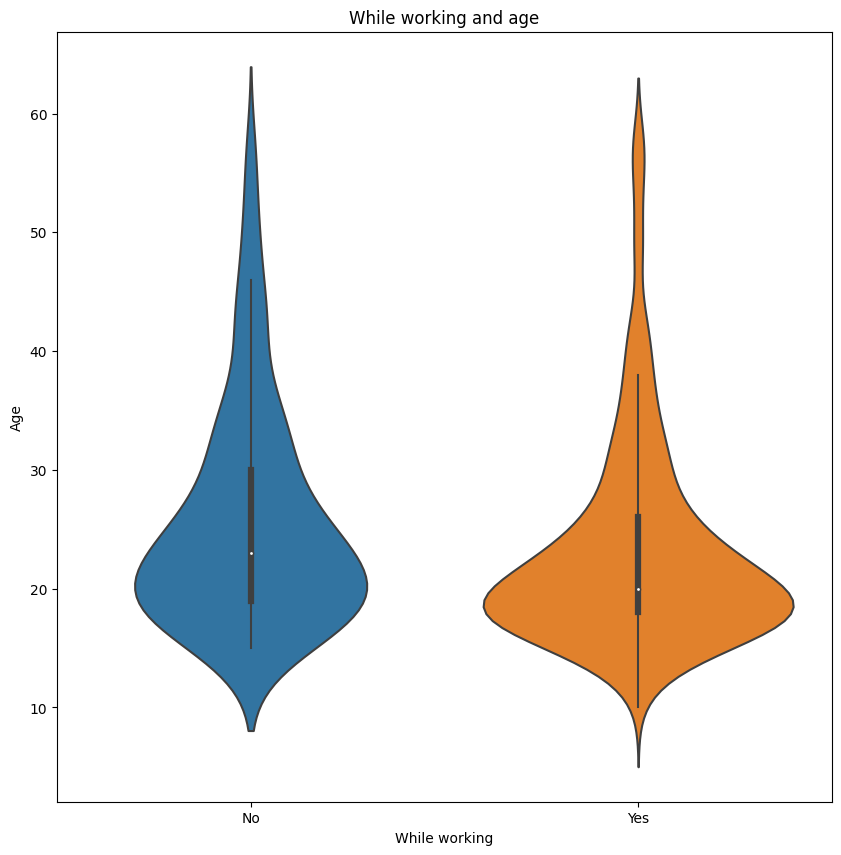

In [26]:
#Vẽ violin plot giữa việc nghe nhạc lúc làm việc và độ tuổi của từng nhóm người trên
plt.figure(figsize = (10, 10))
sns.violinplot(x = 'While working', y = 'Age', data = df)
plt.title('While working and age')
plt.ylabel('Age')
plt.xlabel('While working')
plt.show()

- Qua ba biểu đồ trên, ta có thể thấy được người trẻ sẽ có sáng tác nhạc và chơi nhạc cụ thường xuyên hơn so với người lớn tuổi. và phần lớn mọi người ở bất kì độ tuổi nào thường sẽ có thói quen nghe nhạc trong lúc làm việc.

***Vậy với những thói quen khác nhau như thế này liệu có sự khác biệt giữa sức khỏe tinh thần của mọi người hay không?***

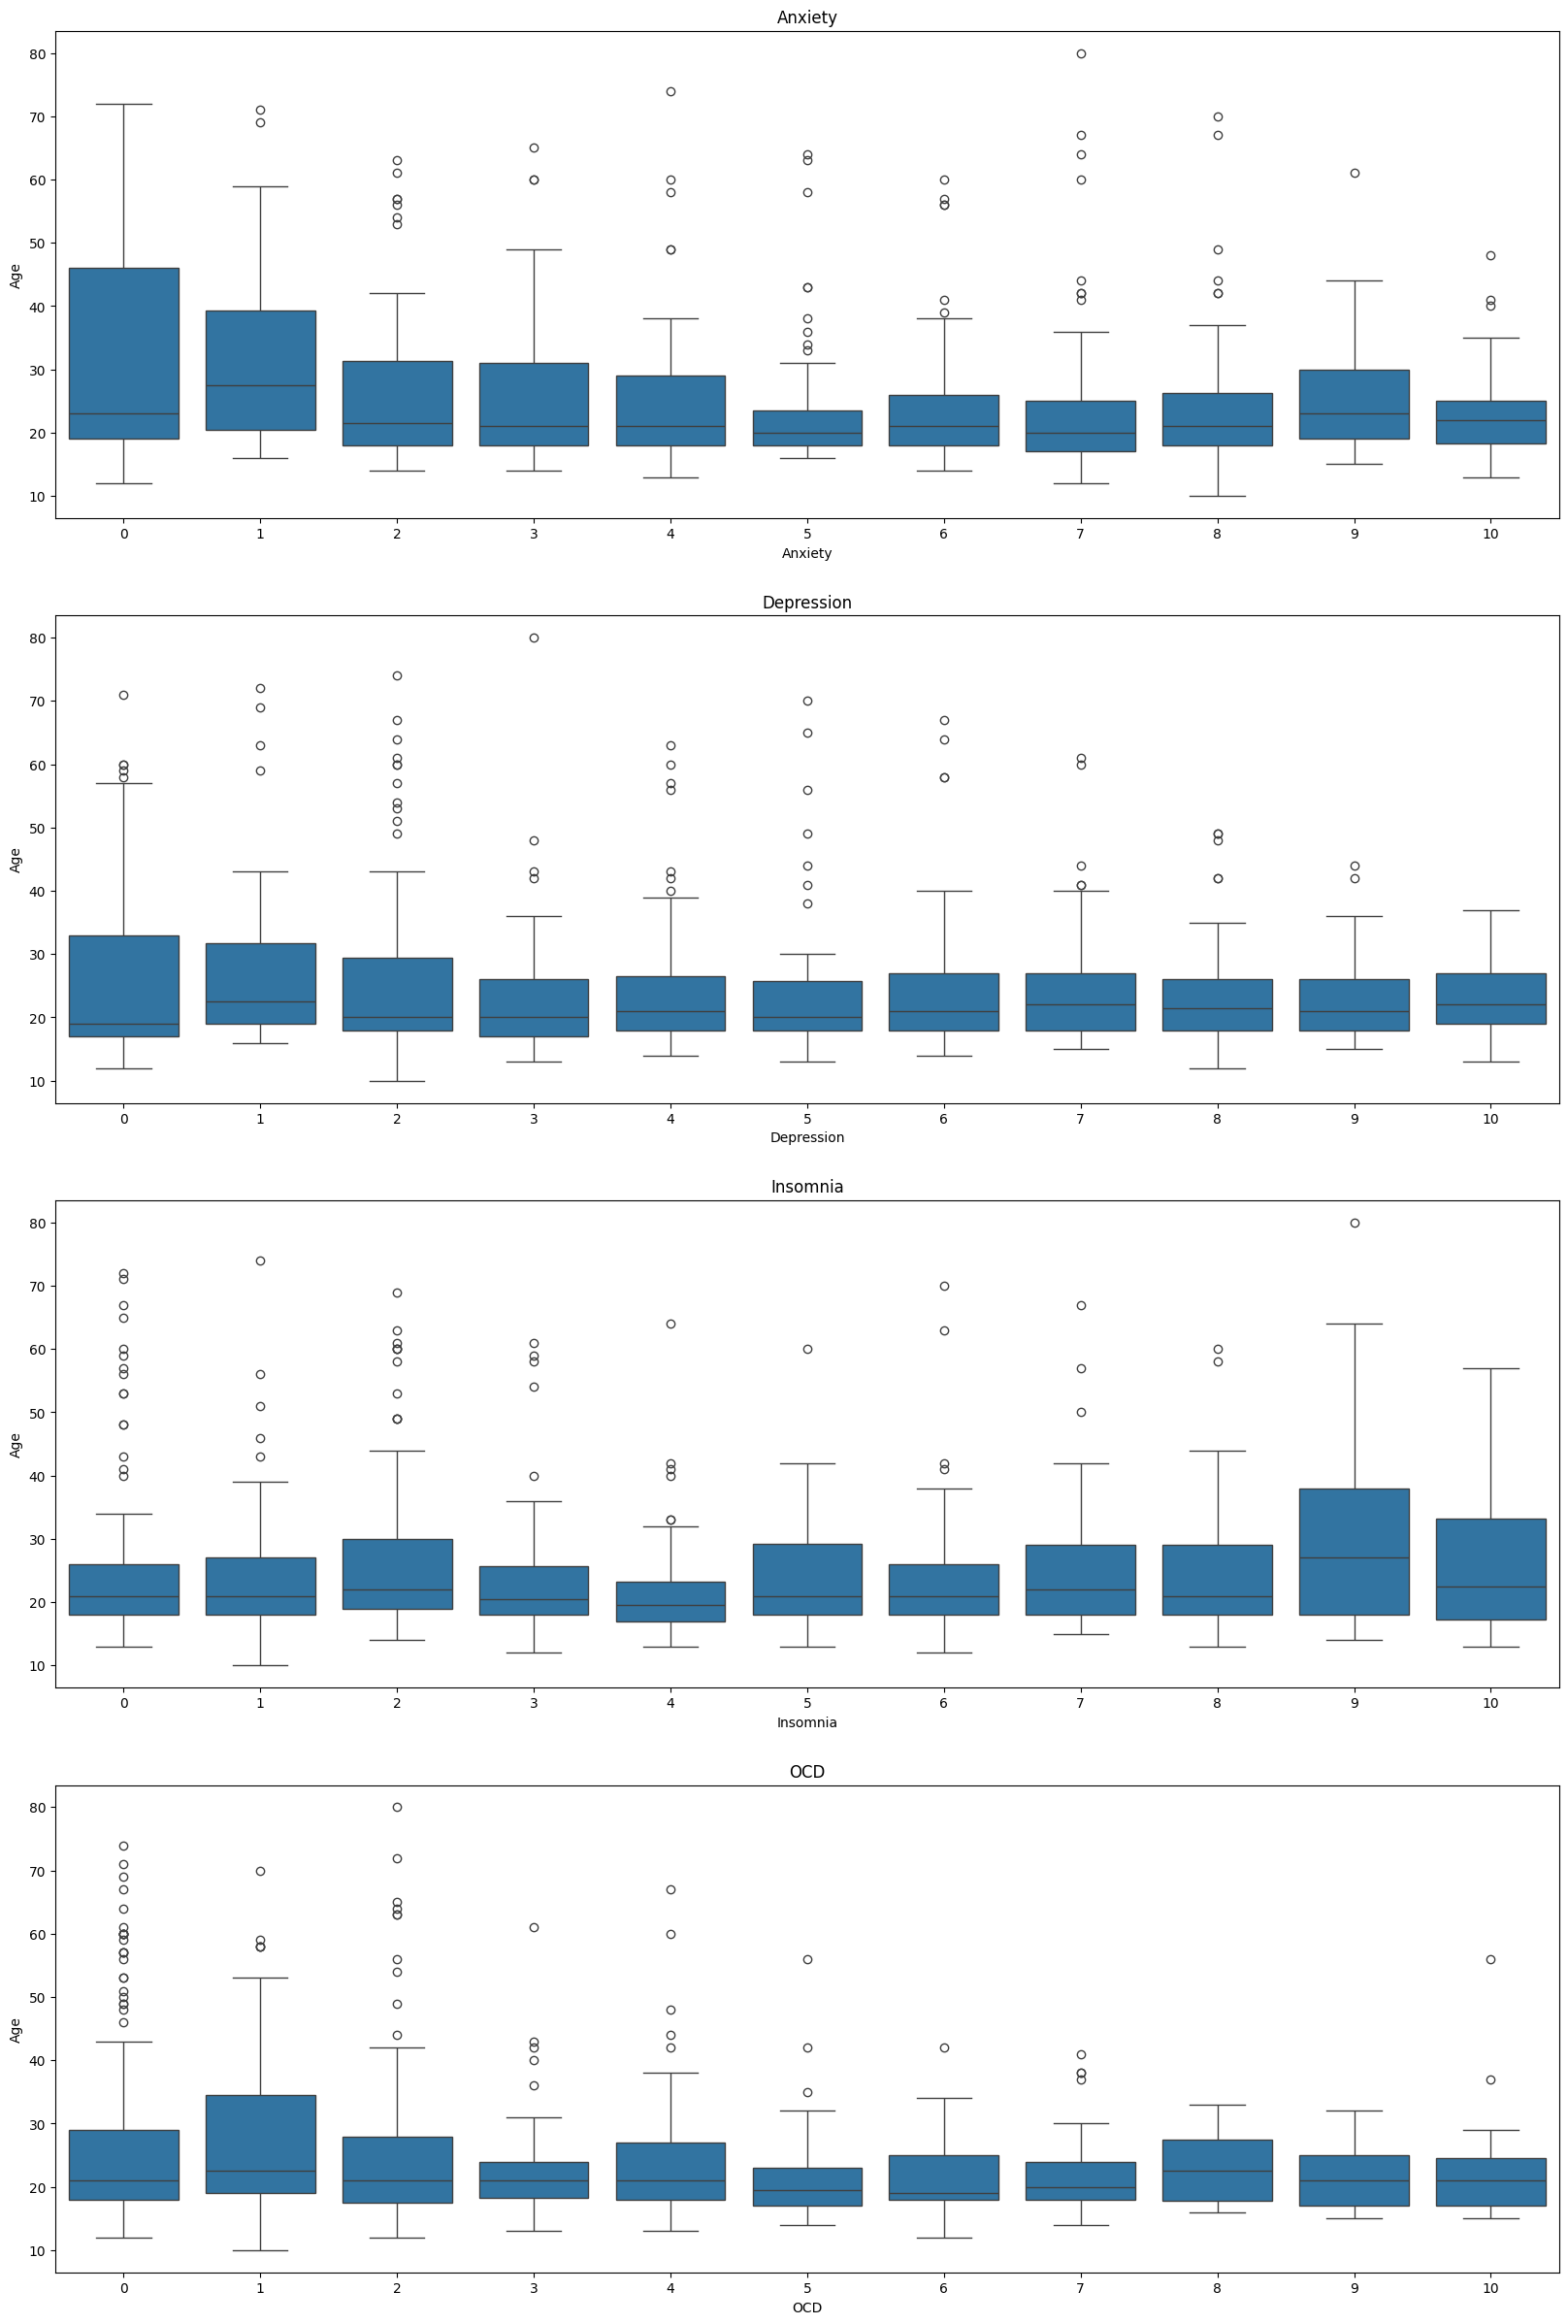

In [67]:
#Anxiety
# plt.figure(figsize = (5, 10))
# plt.scatter(df['Age'], df['Anxiety'])
# plt.title('Anxiety')
# plt.show()
# #Depression
# plt.figure(figsize = (5, 10))
# plt.scatter(df['Age'], df['Depression'])
# plt.title('Depression')
# plt.show()
# #Insomnia
# plt.figure(figsize = (5, 10))
# plt.scatter(df['Age'], df['Insomnia'])
# plt.title('Insomnia')
# plt.show()
# #OCD
# plt.figure(figsize = (5, 10))
# plt.scatter(df['Age'], df['OCD'])
# plt.title('OCD')
# plt.show()
fig, ax = plt.subplots(4, 1, figsize = (20, 30))

# Anxiety
sns.boxplot(x='Anxiety', y='Age', data=df, ax=ax[0])
ax[0].set_title('Anxiety')

# Depression
sns.boxplot(x='Depression', y='Age', data=df, ax=ax[1])
ax[1].set_title('Depression')

# Insomnia
sns.boxplot(x='Insomnia', y='Age', data=df, ax=ax[2])
ax[2].set_title('Insomnia')

# OCD
sns.boxplot(x='OCD', y='Age', data=df, ax=ax[3])
ax[3].set_title('OCD')

plt.show()


- Có thể thấy vì sự chênh lệch số lượng giữa những người trẻ và người lớn tuổi tham gia khảo sát nên không thể khẳng định được, nhưng dựa vào các biểu đồ trên ta có thể thấy người trẻ thường có mức độ bị mắc các vấn đề về tâm lý nặng hơn so với người lớn tuổi. 

- Dựa vào các biểu đồ trên, số lượng người lớn tuổi bị mắc chứng mất ngủ ở mức độ nặng sẽ nhiều hơn so với các vấn đề khác

### Câu 3: Nhịp tim của mỗi người khi nghe dòng nhạc yêu thích có ảnh hưởng tới sức khỏe tinh thần của họ hay không?

In [28]:
df['BPM'].describe()

count    632.000000
mean     121.514241
std       26.857724
min       55.000000
25%      105.000000
50%      120.000000
75%      138.000000
max      192.000000
Name: BPM, dtype: float64

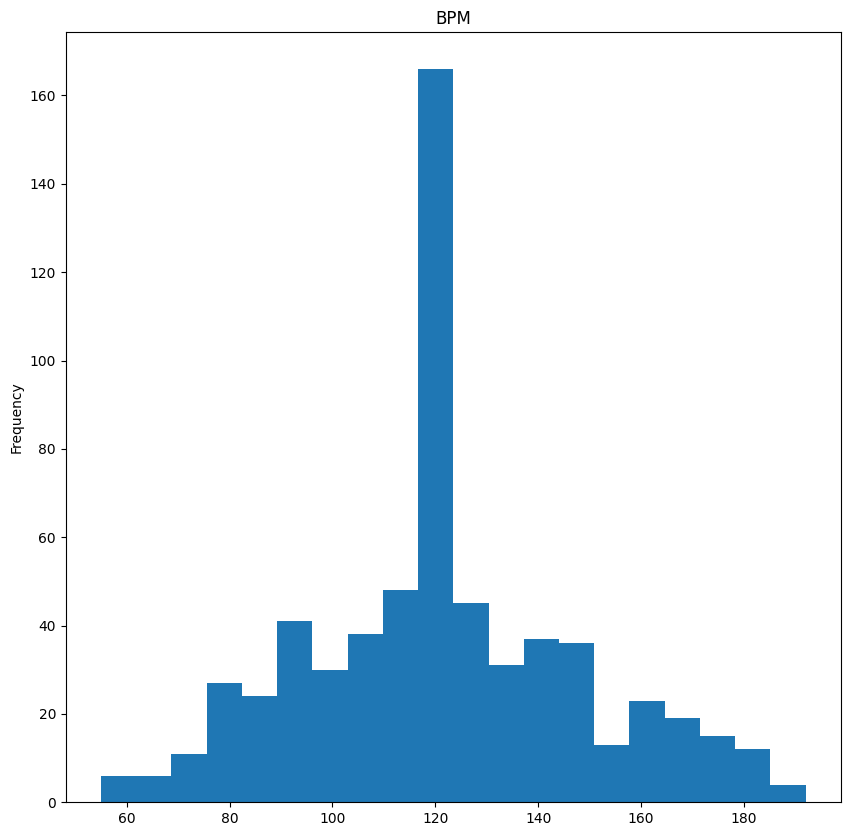

In [29]:
plt.figure(figsize = (10, 10))
df['BPM'].plot(kind = 'hist', bins = 20)
plt.title('BPM')
plt.show()

- Nhịp tim của phần lớn người tham gia khảo sát sẽ rơi vào khoảng 120 nhịp/phút, đây là mức nhịp tim nhanh so với chuẩn của một người trưởng thành 

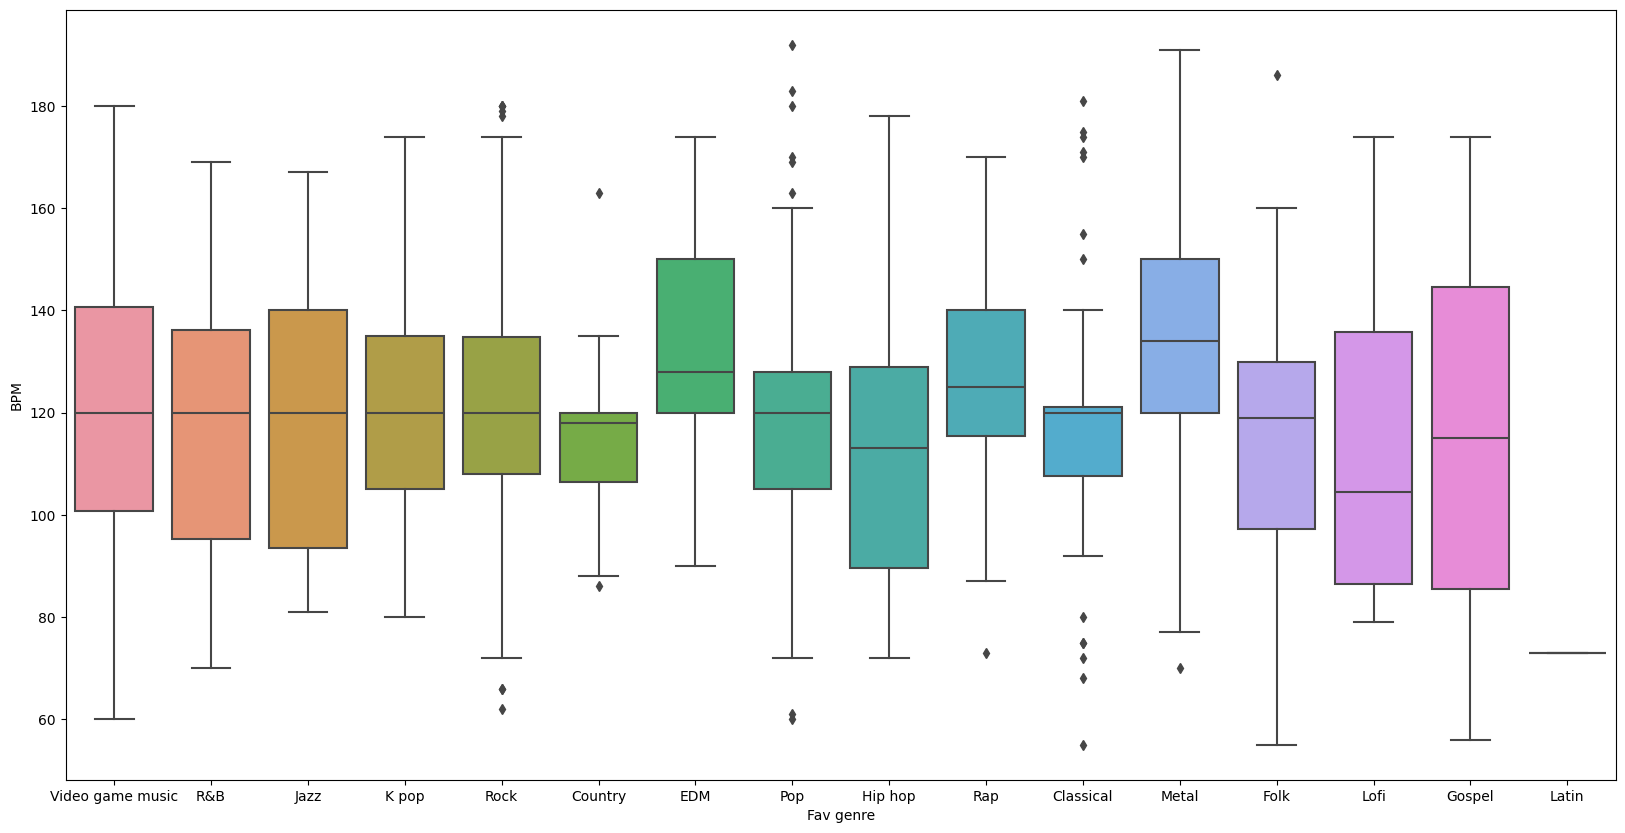

In [30]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='Fav genre', y='BPM', data=df)
plt.show()

- Có thể thấy nhịp tim của những người nghe nhạc EDM, Metal thường sẽ cao hơn so với những người thích nghe các dòng nhạc còn lại. Mặt khác nhịp tim của những người nghe nhạc lofi có xu hướng thấp hơn so với những dòng nhạc khác.

***Vậy nhịp tim có ảnh hưởng tới mức độ các vấn đề tâm lý của người tham gia khảo sát hay không? Liệu những người có nhịp tim cao (> 100) có nguy cơ mắc các vấn đề về tâm lý nặng hơn không?***

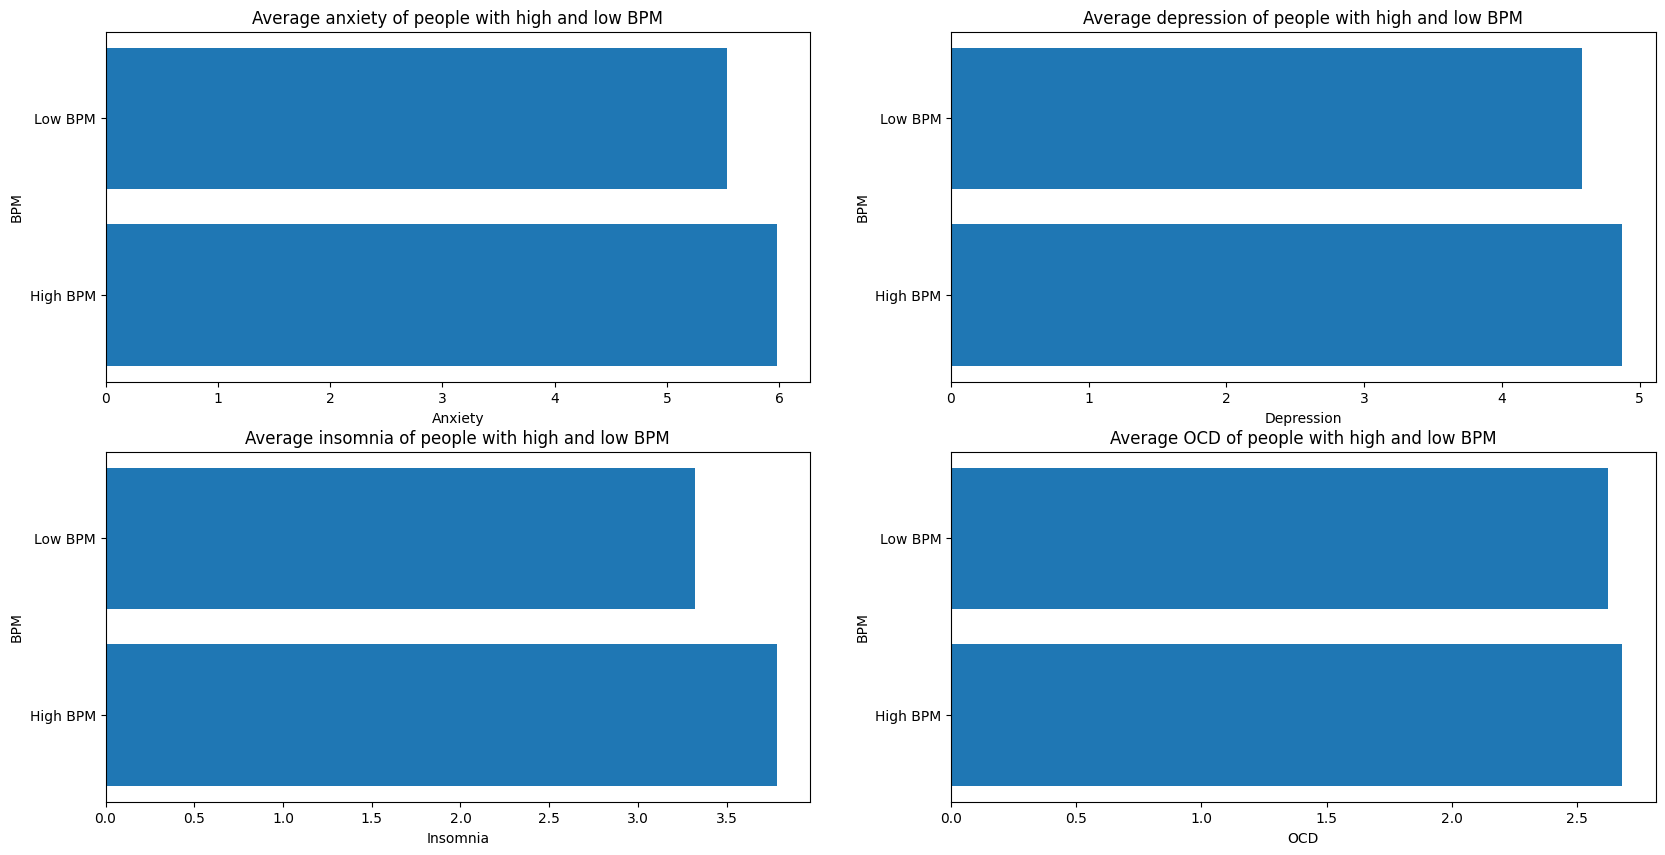

In [31]:
df_high_bpm = df[df['BPM'] > 100]
df_low_bpm = df[df['BPM'] <= 100]
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[0, 0].barh(['High BPM', 'Low BPM'], [df_high_bpm['Anxiety'].mean(), df_low_bpm['Anxiety'].mean()])
ax[0, 0].set_title('Average anxiety of people with high and low BPM')
ax[0, 0].set_xlabel('Anxiety')
ax[0, 0].set_ylabel('BPM')
ax[0, 1].barh(['High BPM', 'Low BPM'], [df_high_bpm['Depression'].mean(), df_low_bpm['Depression'].mean()])
ax[0, 1].set_title('Average depression of people with high and low BPM')
ax[0, 1].set_xlabel('Depression')
ax[0, 1].set_ylabel('BPM')
ax[1, 0].barh(['High BPM', 'Low BPM'], [df_high_bpm['Insomnia'].mean(), df_low_bpm['Insomnia'].mean()])
ax[1, 0].set_title('Average insomnia of people with high and low BPM')
ax[1, 0].set_xlabel('Insomnia')
ax[1, 0].set_ylabel('BPM')
ax[1, 1].barh(['High BPM', 'Low BPM'], [df_high_bpm['OCD'].mean(), df_low_bpm['OCD'].mean()])
ax[1, 1].set_title('Average OCD of people with high and low BPM')
ax[1, 1].set_xlabel('OCD')
ax[1, 1].set_ylabel('BPM')
plt.show()

- Với những người có nhịp tim cao khi nghe dòng nhạc yêu thích thì mức độ về các vấn đề tâm lý của họ thường sẽ nặng hơn so với những người có nhịp tim thấp, nhưng chênh lệch là không quá lớn.

- Thử xem xét độ tương quan giữa nhịp tim và các giá trị này 

In [32]:
df_corr = pd.DataFrame([df['BPM'].corr(df['Anxiety']), df['BPM'].corr(df['Depression']), df['BPM'].corr(df['Insomnia']), df['BPM'].corr(df['OCD'])])
df_corr.index = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
df_corr = df_corr.rename(columns={0: 'Correlation'})
df_corr

,Correlation
Anxiety,0.053067
Depression,0.041486
Insomnia,0.053200
OCD,-0.008225


- Có thể thấy không có mối tương quan, quan hệ nào rõ rệt giữa nhịp tim khi nghe dòng nhạc ưa thích với mức độ nghiêm trọng của các vấn đề tâm lý